In [1]:
%matplotlib inline

In [2]:
import msmbuilder
import numpy as np
from matplotlib import pyplot

In [3]:
# Load dataset
import pandas as pd
df = pd.read_csv('BIGRAPA_COGS.csv', sep=',',header=0, index_col=0)

In [4]:
df

BS1D      BS1S      BS2D      BS2S      BS3D      BS3S  \
ID                                                                     
COG0      0.020040  0.080160  0.000000  0.020040  0.000000  0.020040   
COG1000   0.131540  0.173393  0.077728  0.089686  0.053812  0.065770   
COG100    0.122072  0.070972  0.051100  0.031228  0.011356  0.022711   
COG10     0.092842  0.062805  0.019114  0.057343  0.002731  0.021845   
COG1002   0.013258  0.066290  0.026516  0.053032  0.000000  0.013258   
COG10024  0.000000  0.063694  0.000000  0.000000  0.000000  0.000000   
COG10029  0.034800  0.052201  0.017400  0.052201  0.017400  0.017400   
COG10045  0.040917  0.000000  0.000000  0.000000  0.000000  0.000000   
COG10047  0.019243  0.040624  0.006414  0.012829  0.000000  0.008552   
COG1005   0.271535  0.185253  0.124348  0.098971  0.071056  0.043141   
COG10054  0.000000  0.008116  0.008116  0.000000  0.000000  0.000000   
COG10062  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
COG10064  0.022663  0.124646  0.005666  0.050992  0.000000  0.016997   
COG1007   0.092390  0.118787  0.013199  0.079192  0.013199  0.013199   
COG10073  0.023302  0.085441  0.038837  0.031069  0.023302  0.011651   
COG10077  0.048100  0.054971  0.013743  0.027486  0.006871  0.006871   
COG10085  0.000000  0.179743  0.012839  0.077033  0.000000  0.025678   
COG10088  0.284698  0.204626  0.160142  0.174970  0.091934  0.136418   
COG1009   0.122469  0.138583  0.048343  0.061234  0.012891  0.022560   
COG10091  0.018620  0.041894  0.013965  0.023275  0.000000  0.004655   
COG10092  0.000000  0.017831  0.005944  0.020802  0.000000  0.005944   
COG1010   0.021053  0.007895  0.002632  0.010526  0.000000  0.015790   
COG101    0.018137  0.090687  0.027206  0.045344  0.015790  0.018137   
COG1011   0.036285  0.108855  0.030238  0.024190  0.018143  0.018143   
COG1012   0.019407  0.032345  0.000000  0.019407  0.000000  0.006469   
COG1014   0.031382  0.091294  0.019971  0.037088  0.008559  0.011412   
COG10152  0.000000  0.079545  0.013258  0.039773  0.000000  0.013258   
COG1016   0.035269  0.094049  0.052903  0.058781  0.000000  0.017634   
COG1017   0.070577  0.083894  0.045276  0.075904  0.026633  0.023970   
COG10174  0.000000  0.000000  0.014690  0.007345  0.014690  0.000000   
...            ...       ...       ...       ...       ...       ...   
COG979    0.010681  0.234984  0.032043  0.133514  0.010681  0.053405   
COG98     0.000000  0.101275  0.000000  0.019761  0.000000  0.009881   
COG980    0.039522  0.062084  0.029642  0.079823  0.022231  0.026607   
COG9810   0.087591  0.262774  0.140146  0.087591  0.070073  0.087591   
COG9827   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
COG983    0.089823  0.054892  0.019961  0.024951  0.024951  0.014971   
COG9840   0.011050  0.000000  0.000000  0.022099  0.000000  0.000000   
COG984    0.011905  0.047619  0.005952  0.029762  0.022099  0.000000   
COG985    0.034511  0.086278  0.000000  0.034511  0.000000  0.017256   
COG986    0.000000  0.062345  0.093517  0.109104  0.006032  0.046759   
COG9860   0.015586  0.072386  0.012064  0.048257  0.062345  0.006032   
COG987    0.177043  0.192607  0.108949  0.190661  0.087549  0.083658   
COG9872   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
COG988    0.134735  0.191465  0.099278  0.099278  0.078004  0.014183   
COG9890   0.000000  0.136364  0.037190  0.000000  0.049587  0.061983   
COG989    0.133786  0.133786  0.114674  0.057337  0.076449  0.038225   
COG9899   0.043689  0.048544  0.009709  0.014563  0.009709  0.009709   
COG99     0.000000  0.041881  0.020941  0.000000  0.000000  0.000000   
COG990    0.000000  0.052591  0.026295  0.026295  0.000000  0.013148   
COG9924   0.000000  0.000000  0.008282  0.000000  0.016563  0.000000   
COG994    0.048164  0.040137  0.024082  0.032109  0.008027  0.008027   
COG9941   0.000000  0.016529  0.016529  0.024793  0.033058  0.008264   
COG996    0.036514  0.073028  0.024343  0.060857  0.00

In [5]:
# Define a similarity metric between different conditions
def similarity(x, y):
    numer = np.dot(x,y)
    x2 = np.dot(x,x)
    y2 = np.dot(y,y)
    denom = np.sqrt(x2 * y2)
    if (x2 == 0.0) and (y2 == 0.0): 
        s = 1.0
    elif (denom == 0.0):
        s = 0.0
    else:
        s = numer / denom
    return s

In [6]:
# Compute the similarity matrix on a subset of the data
ndata = 1500 # For debugging, we're only using this many gene sets
data = df.as_matrix()[:ndata,:] # subset
[nrows, ncols] = data.shape
S = np.zeros([nrows, nrows], np.float32)
for i in range(nrows):
    for j in range(i, nrows):
        S[i,j] = S[j,i] = similarity(data[i,:], data[j,:])

In [7]:
# Save the computed similarity matrix to disk
np.savez('similarity.npz', S)

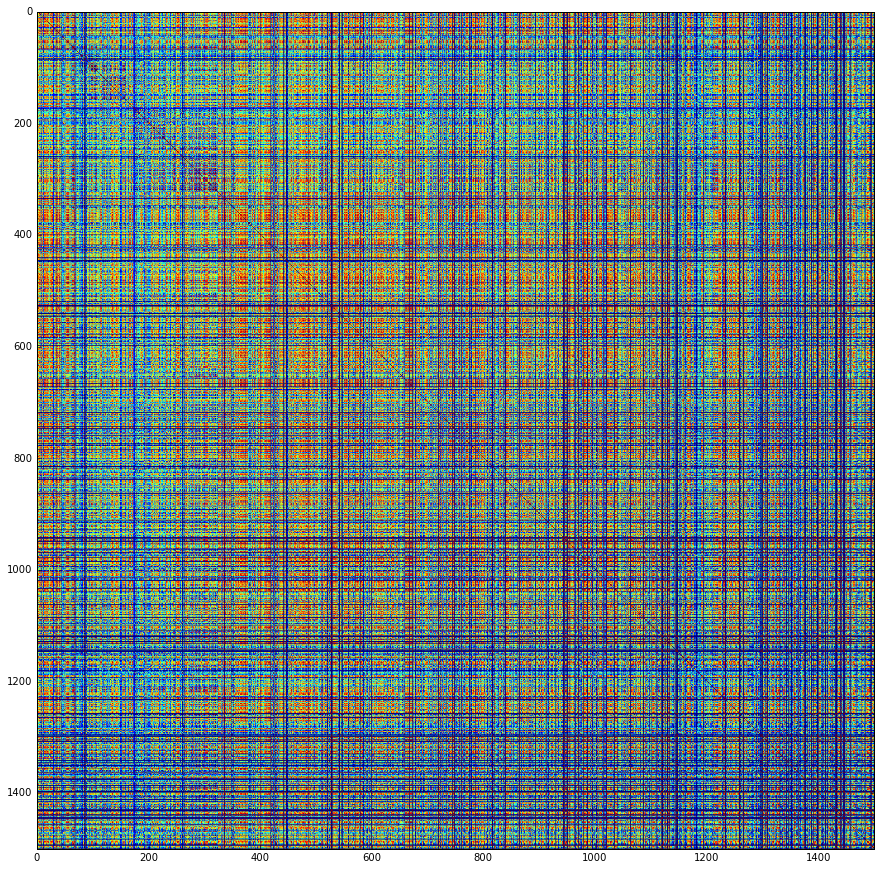

In [8]:
# Plot the original similarity matrix
pyplot.figure(figsize=[15,30]);
pyplot.imshow(S);

In [9]:
# Spectral clustering
import msmbuilder.cluster

In [10]:
# transform to log data
data = df.as_matrix()[:ndata,:] # subset
log_zero = np.log(data[data > 0.0].min() / 2.0)
log_data = np.log(data)
log_data[log_data == -np.inf] = log_zero # for no reads

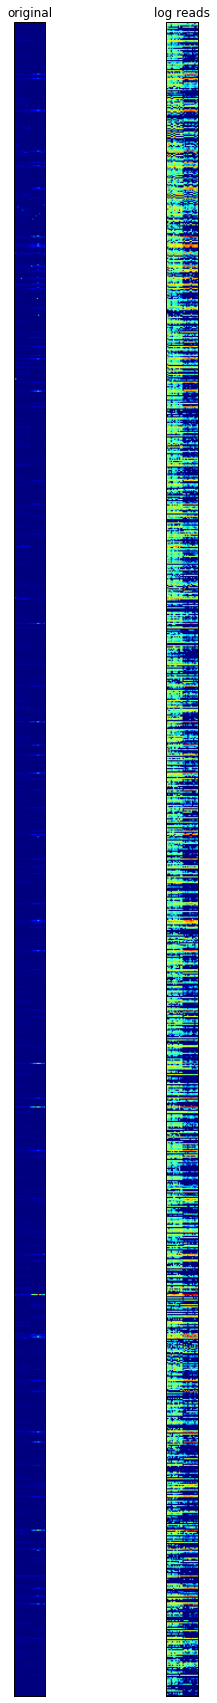

In [11]:
# Plot the original data
pyplot.figure(figsize=[5,30])
pyplot.subplot(1,2,1);
pyplot.imshow(data);
pyplot.title('original');
pyplot.xticks([]);
pyplot.yticks([]);

pyplot.subplot(1,2,2);
pyplot.title('log reads');
pyplot.imshow(log_data);
pyplot.xticks([]);
pyplot.yticks([]);

In [12]:
# Fit using precomputed similarity matrix
#clustering = msmbuilder.cluster.SpectralClustering(n_clusters=25, affinity='precomputed', assign_labels='kmeans')
#clustering.fit([S])

# Alternative: Fit using radial basis function distance
clustering = msmbuilder.cluster.SpectralClustering(n_clusters=10, affinity='rbf', gamma=0.01, assign_labels='kmeans', n_init=500)
clustering.fit([log_data])

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=0.01, kernel_params=None,
          n_clusters=10, n_init=500, n_neighbors=10, random_state=None)

In [13]:
# Reorder the similarity matrix S and data to group gene sets in the same cluster next to each other
labels = clustering.labels_[0]
order = np.argsort(labels)
S = clustering.affinity_matrix_
S_sorted = S[order,:]
S_sorted = S_sorted[:,order]
data_sorted = data[order,:]
log_data_sorted = log_data[order,:]
labels_sorted = labels[order]

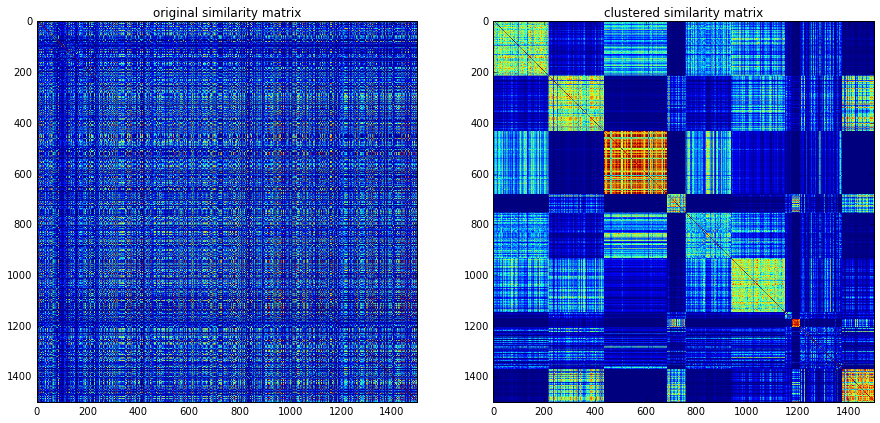

In [14]:
# Plot the original and clustered similarity matrices
pyplot.figure(figsize=[15,30])
pyplot.subplot(1,2,1);
pyplot.imshow(S);
pyplot.title('original similarity matrix');
pyplot.subplot(1,2,2);
pyplot.imshow(S_sorted);
pyplot.title('clustered similarity matrix');

[0, 50, 0, 10]

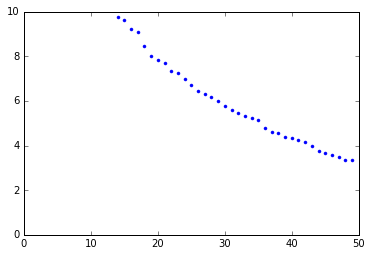

In [15]:
# Plot dominant eigenvalues
from scipy.sparse.linalg import eigsh
kmax = 50 # max num of eigenvalues
[eigenvalues, eigenvectors] = eigsh(S, k=kmax)
eigenvalues = eigenvalues[::-1]
pyplot.plot(eigenvalues, '.');
pyplot.axis([0, kmax, 0, 10])

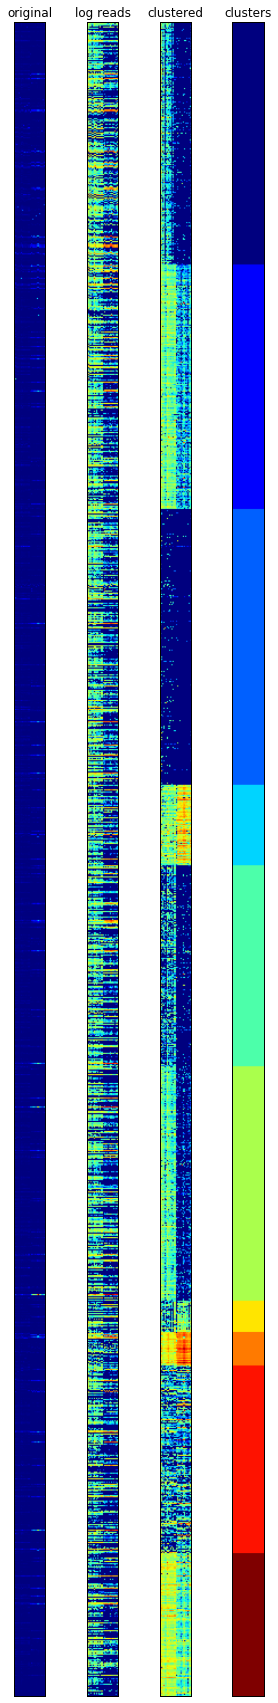

In [16]:
# Plot the original and clustered data matrices (using log reads for clarity)
pyplot.figure(figsize=[5,30])

pyplot.subplot(1,4,1);
pyplot.imshow(data);
pyplot.title('original');
pyplot.xticks([]);
pyplot.yticks([]);

pyplot.subplot(1,4,2);
pyplot.imshow(log_data);
pyplot.title('log reads');
pyplot.xticks([]);
pyplot.yticks([]);

pyplot.subplot(1,4,3);
pyplot.imshow(log_data_sorted);
pyplot.title('clustered');
pyplot.xticks([]);
pyplot.yticks([]);

pyplot.subplot(1,4,4);
pyplot.imshow(np.tile(np.reshape(labels_sorted, [ndata,1]), [1,28]));
pyplot.title('clusters');
pyplot.xticks([]);
pyplot.yticks([]);
